# SAS On-the-Job | Part 3
## Role: Data Analyst within the Department of Health and Human Services

### The Final Chapter! Map Time!
R you ready for the R portion of our analysis? And do you love a bad pun? Then you're in just the right place!

In Part 3 of our HHS adventures, we return to our state-level data on labor supply by prime-aged women aged 25-54. Our analytical objective in this section is to use the cool geographic mapping procedures in R to examine changes in the unemployment rate and the labor force participation rate from 2015 to 2022. As is the consistent theme, the general goal here is to see whether pre-COVID trends are back.  Because if they're not, HHS leadership could advocate for policies to support segments of women in the labor force, for example, women with small children.

Let's finish our analysis strong!

#### Prepare the R Environment
The first step is to load the requisite libraries in R. Note that a library is a different thing in R than SAS. In R, it's a package of tools, rather than a pointer to a data location. That's a fun fact for your next trivia night!

In [1]:
# Load required libraries
library(ggplot2)
library(reshape2)
library(grid)
library(scales)
library(mapproj)
library(viridis)
library(maps)
library(haven)

Loading required package: maps

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:maps’:

    unemp


The following object is masked from ‘package:scales’:

    viridis_pal




#### Access Map Data in R
Next, we'll want to leverage data that's already included as part of the R install. We can then link this data to our data set - and ensure that data gets assigned properly in our upcoming maps.

In [2]:
# R comes with some pre-installed map data. Let's leverage that in this analysis

# Load the U.S. state map data
map_data <- map_data("state")

# Ensure Proper Casing for Merge
map_data$region = toupper(map_data$region)

It's never a bad thing to explore your data.  So, let's check out the first 10 observations in *map_data* to ensure that it's in a form we recognize.

In [3]:
head(map_data,10)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-87.46201,30.38968,1,1,ALABAMA,NA
2,-87.48493,30.37249,1,2,ALABAMA,NA
3,-87.52503,30.37249,1,3,ALABAMA,NA
4,-87.53076,30.33239,1,4,ALABAMA,NA
5,-87.57087,30.32665,1,5,ALABAMA,NA
6,-87.58806,30.32665,1,6,ALABAMA,NA
7,-87.59379,30.30947,1,7,ALABAMA,NA
8,-87.59379,30.28655,1,8,ALABAMA,NA
9,-87.67400,30.27509,1,9,ALABAMA,NA


And that's just a big ole data set, which is why we limited it.

Now let's prepare *covid_labor_supply2* for a merge.  Note that we need to match case on the *State_Name*, which is why we've got that extra line of code.

In [4]:
# Prepare the data from Part 2 for a merge
data1 <- read_sas('covid_labor_supply2.sas7bdat')

# Adjust Casing for Merge
data1$State_Name = toupper(data1$State_Name)

Let's explore the data one more time - to ensure that we've got the right one:

In [5]:
data1

State_FIP,State_Name,Year,UE_Women,LFP_Women,UE_Women_HS,UE_Women_SCollege,UE_Women_CollegeP,LFP_Women_HS,LFP_Women_SCollege,LFP_Women_CollegeP,UE_Women_NoKids,UE_Women_OlderKids,UE_Women_YoungKids,LFP_Women_NoKids,LFP_Women_OlderKids,LFP_Women_YoungKids
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ALABAMA,2015,0.05903514,0.7120473,0.08071777,0.05814288,0.02094154,0.6368446,0.7686367,0.8354862,0.04901631,0.05564815,0.09521978,0.7024886,0.7514901,0.6265883
1,ALABAMA,2016,0.04944853,0.7001156,0.06312331,0.05633199,0.02382474,0.6306299,0.7564194,0.8039712,0.04820105,0.04490661,0.06510374,0.6861447,0.7284291,0.6611261
1,ALABAMA,2017,0.04078107,0.6901163,0.05017575,0.05711202,0.00985866,0.5927814,0.7514234,0.8062791,0.04316072,0.03934286,0.03861194,0.7022365,0.6980599,0.6405919
1,ALABAMA,2018,0.03973231,0.7044006,0.05505923,0.03617405,0.02622995,0.5949498,0.7550574,0.8102880,0.03756554,0.03094978,0.06988186,0.7108500,0.7144869,0.6622985
1,ALABAMA,2019,0.02619557,0.7215607,0.04950904,0.01513010,0.01508446,0.6365994,0.7471347,0.8495096,0.02165193,0.03038253,0.02664742,0.7182144,0.7449315,0.6736837
1,ALABAMA,2020,0.05666085,0.7270269,0.07461227,0.07200355,0.03239635,0.6264771,0.7516498,0.8416940,0.04491356,0.05462171,0.08841743,0.7055134,0.7595975,0.6977076
1,ALABAMA,2021,0.03245672,0.7124474,0.05794357,0.02744716,0.01925082,0.6256072,0.7531953,0.8061328,0.04350295,0.02615458,0.02128200,0.7113314,0.7469807,0.6237506
1,ALABAMA,2022,0.02901746,0.7142394,0.04939848,0.02008251,0.01883617,0.6472077,0.7381429,0.8119118,0.02873518,0.02675939,0.03620526,0.7156805,0.7284411,0.6732256
2,ALASKA,2015,0.05086221,0.7352526,0.08122067,0.04844351,0.03400126,0.6426811,0.7174740,0.8424400,0.04444859,0.04000823,0.08592144,0.7702726,0.7858041,0.6018600


#### Merge Time, Merge Time!
Are you ready to pull together the two pieces? Well, I used an exclamation point, so you know that I’m excited. Use the following code to combine *map_data* from R with our aggregated ACS data set.  Data populated all the way across the row tells us that the merge was done properly - so check for that:

In [6]:
# Merge the data with map data
state_map_data <- merge(map_data, data1, by.x = "region", by.y = "State_Name", all.x = TRUE)

# Let's check out the first 20 observations of the merged data!
head(state_map_data,20)

,region,long,lat,group,order,subregion,State_FIP,Year,UE_Women,LFP_Women,⋯,UE_Women_CollegeP,LFP_Women_HS,LFP_Women_SCollege,LFP_Women_CollegeP,UE_Women_NoKids,UE_Women_OlderKids,UE_Women_YoungKids,LFP_Women_NoKids,LFP_Women_OlderKids,LFP_Women_YoungKids
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ALABAMA,-87.46201,30.38968,1,1,NA,1,2019,0.02619557,0.7215607,⋯,0.01508446,0.6365994,0.7471347,0.8495096,0.02165193,0.03038253,0.02664742,0.7182144,0.7449315,0.6736837
2,ALABAMA,-87.46201,30.38968,1,1,NA,1,2020,0.05666085,0.7270269,⋯,0.03239635,0.6264771,0.7516498,0.8416940,0.04491356,0.05462171,0.08841743,0.7055134,0.7595975,0.6977076
3,ALABAMA,-87.46201,30.38968,1,1,NA,1,2021,0.03245672,0.7124474,⋯,0.01925082,0.6256072,0.7531953,0.8061328,0.04350295,0.02615458,0.02128200,0.7113314,0.7469807,0.6237506
4,ALABAMA,-87.46201,30.38968,1,1,NA,1,2022,0.02901746,0.7142394,⋯,0.01883617,0.6472077,0.7381429,0.8119118,0.02873518,0.02675939,0.03620526,0.7156805,0.7284411,0.6732256
5,ALABAMA,-87.46201,30.38968,1,1,NA,1,2018,0.03973231,0.7044006,⋯,0.02622995,0.5949498,0.7550574,0.8102880,0.03756554,0.03094978,0.06988186,0.7108500,0.7144869,0.6622985
6,ALABAMA,-87.46201,30.38968,1,1,NA,1,2015,0.05903514,0.7120473,⋯,0.02094154,0.6368446,0.7686367,0.8354862,0.04901631,0.05564815,0.09521978,0.7024886,0.7514901,0.6265883
7,ALABAMA,-87.46201,30.38968,1,1,NA,1,2016,0.04944853,0.7001156,⋯,0.02382474,0.6306299,0.7564194,0.8039712,0.04820105,0.04490661,0.06510374,0.6861447,0.7284291,0.6611261
8,ALABAMA,-87.46201,30.38968,1,1,NA,1,2017,0.04078107,0.6901163,⋯,0.00985866,0.5927814,0.7514234,0.8062791,0.04316072,0.03934286,0.03861194,0.7022365,0.6980599,0.6405919
9,ALABAMA,-87.48493,30.37249,1,2,NA,1,2019,0.02619557,0.7215607,⋯,0.01508446,0.6365994,0.7471347,0.8495096,0.02165193,0.03038253,0.02664742,0.7182144,0.7449315,0.6736837


Data look good to me. How are things on your end? Do you see data all the way across the row?

#### One More Housekeeping Item
The last analysis preparation item is to think a bit more about how the map of the U.S. will appear. And while the exact details of *theme_map* can be handled on another day, let's steal some code to create a pretty theme map for our upcoming plots.

In [7]:
# Check this out (but don't ask me what each piece means)
# Source Code: https://socviz.co/index.html#preface ==> this book is great! 
theme_map <- function(base_size=20, base_family="") {
  require(grid)
  theme_bw(base_size=base_size, base_family=base_family) %+replace%
    theme(axis.line=element_blank(),
          axis.text=element_blank(),
          axis.ticks=element_blank(),
          axis.title=element_blank(),
          panel.background=element_blank(),
          panel.border=element_blank(),
          panel.grid=element_blank(),
          panel.spacing=unit(0, "lines"),
          plot.background=element_blank(),
          legend.justification = c(0,0),
          legend.position = c(0,0),
          legend.key.width = unit(20,"lines")
    )
}

options(repr.plot.width = 24, repr.plot.height = 16)

Data are now loaded into R - and the theme map is ready to go. Let's get our mapping on!

#### Unemployment Rate Analysis
Let's now explore the unemployment rate across time in the U.S. We'll just focus on the continental U.S. (to simplify) but let's examine the trends for all prime-aged women:

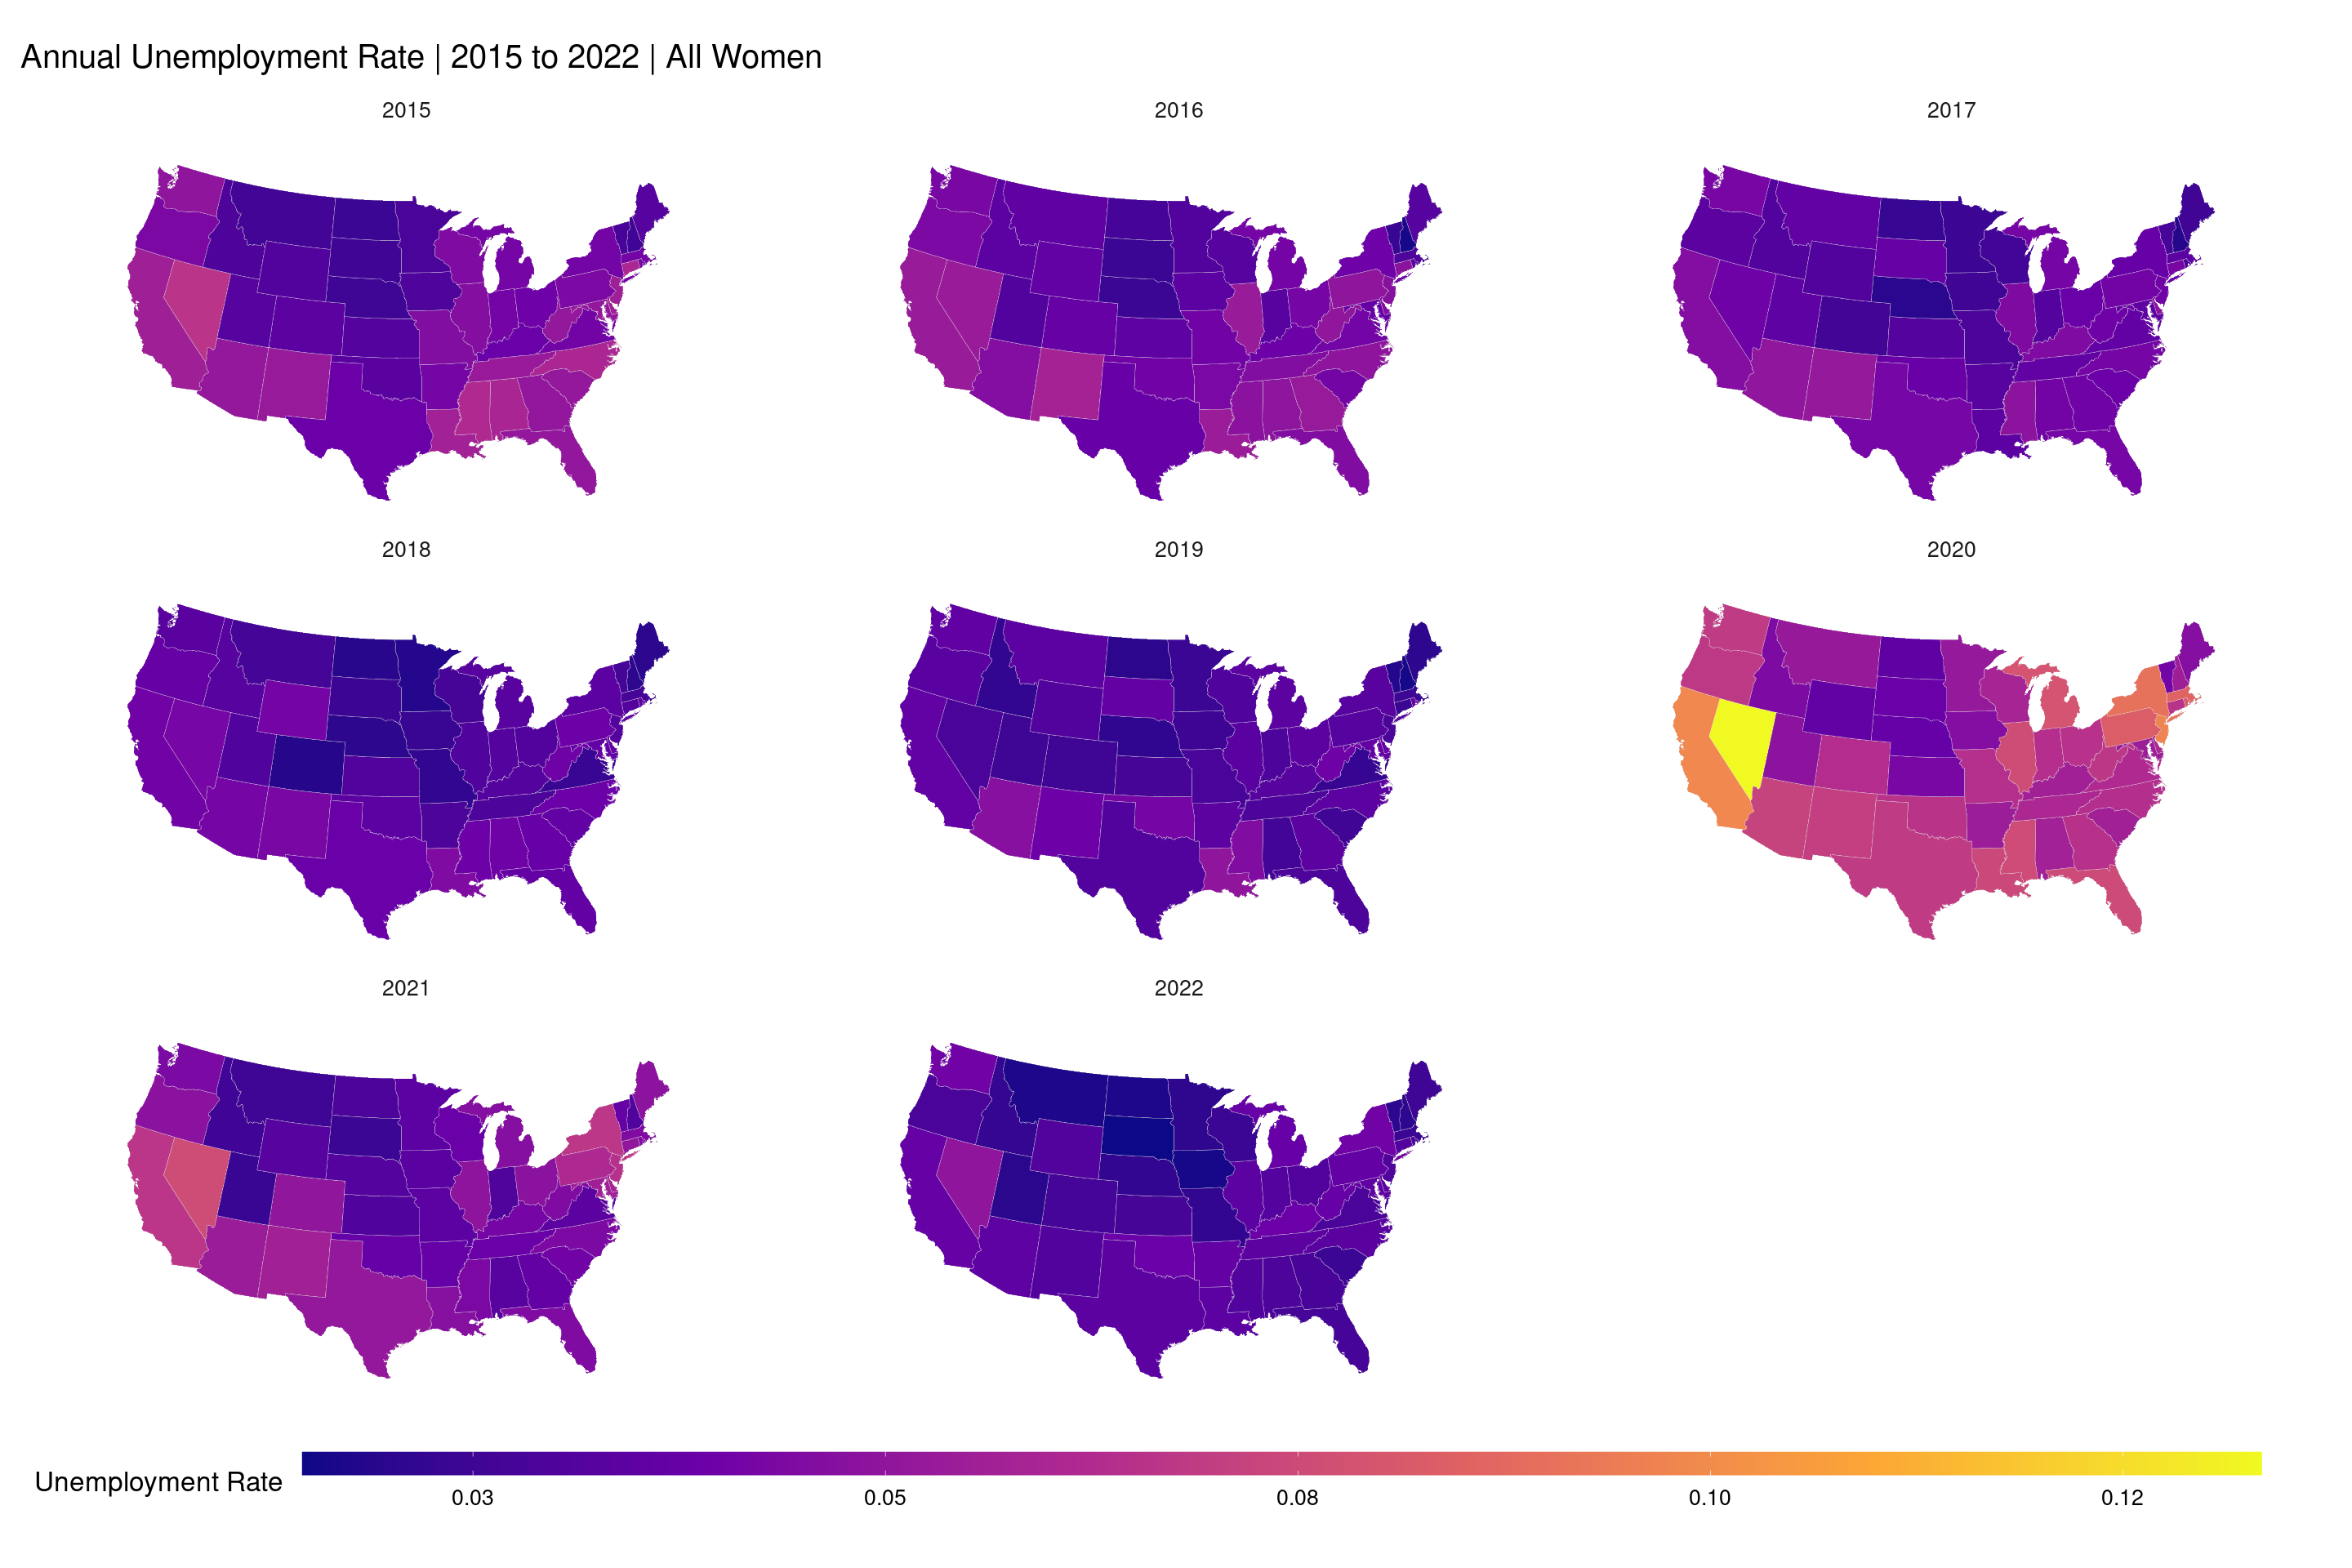

In [8]:
p0 <- ggplot(data = subset(state_map_data),
             mapping = aes(x = long, y = lat,
                           group = group,
                           fill = UE_Women))

p1 <- p0 + geom_polygon(color = "gray90", linewidth = 0.10) +
  coord_map(projection = "albers", lat0 = 39, lat1 = 45) 

p2 <- p1 + scale_fill_viridis_c(option = "plasma", label=function(x) sprintf("%.2f",x))

p2 + theme_map() + facet_wrap(~ Year, ncol = 3) +
  theme(legend.position = "bottom", strip.background = element_blank()) +
  labs(fill = "Unemployment Rate ",
       title = "Annual Unemployment Rate | 2015 to 2022 | All Women") 

What do you see in these trends? Again, I see that trends have returned to the pre-pandemic levels.  And, dare I say it, it looks like employment prospects is better in 2022 than it was in the earlier period.

Because it's easy, let's just modify the code above and change UE_Women to UE_Women_YoungKids. The code:

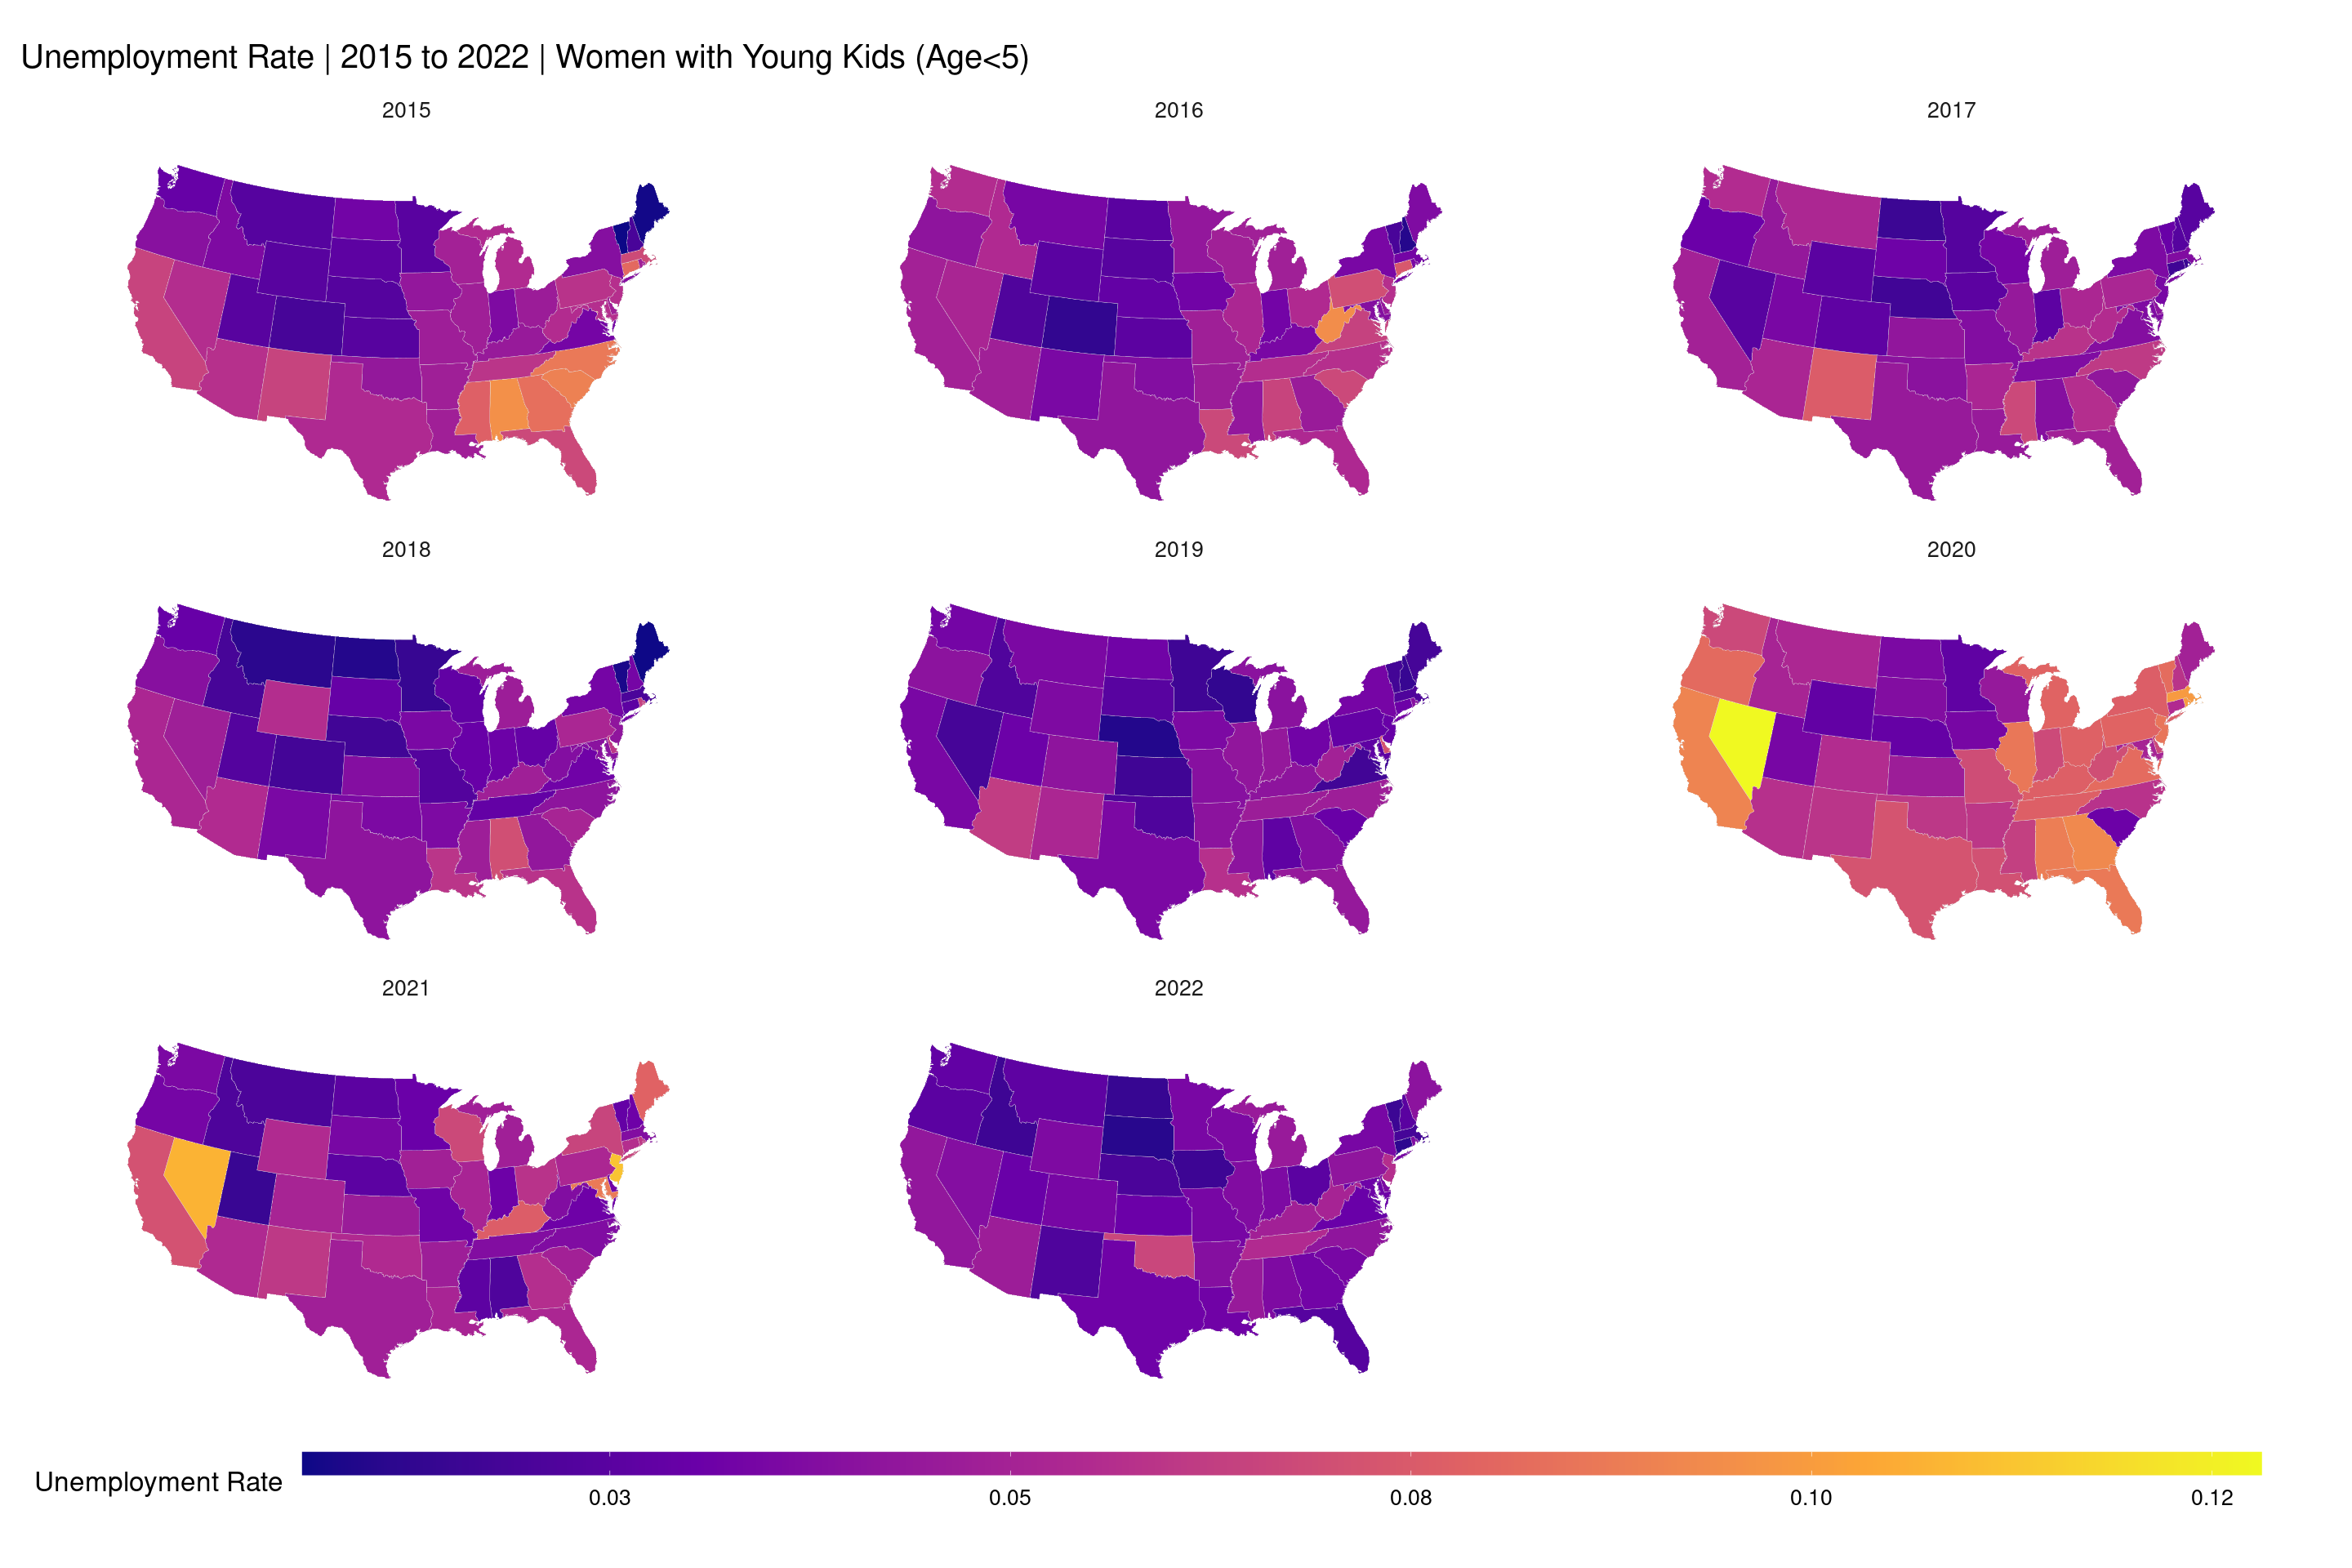

In [9]:
p0 <- ggplot(data = subset(state_map_data),
             mapping = aes(x = long, y = lat,
                           group = group,
                           fill = UE_Women_YoungKids))

p1 <- p0 + geom_polygon(color = "gray90", linewidth = 0.10) +
  coord_map(projection = "albers", lat0 = 39, lat1 = 45) 

p2 <- p1 + scale_fill_viridis_c(option = "plasma", label=function(x) sprintf("%.2f",x))

p2 + theme_map() + facet_wrap(~ Year, ncol = 3) +
  theme(legend.position = "bottom",
        strip.background = element_blank()) +
  labs(fill = "Unemployment Rate ",
       title = "Unemployment Rate | 2015 to 2022 | Women with Young Kids (Age<5)") 

Again, a similar story plays out. Unemployment rates have returned to their pre-pandemic norms... and might be even better than they were in the early period.

#### Labor Force Participation Rate Analysis
Because this code is so easy to modify after it's written, let's examine the labor force participant rate for all women. The story shouldn't change, but it is interesting to see the variation over time within states.

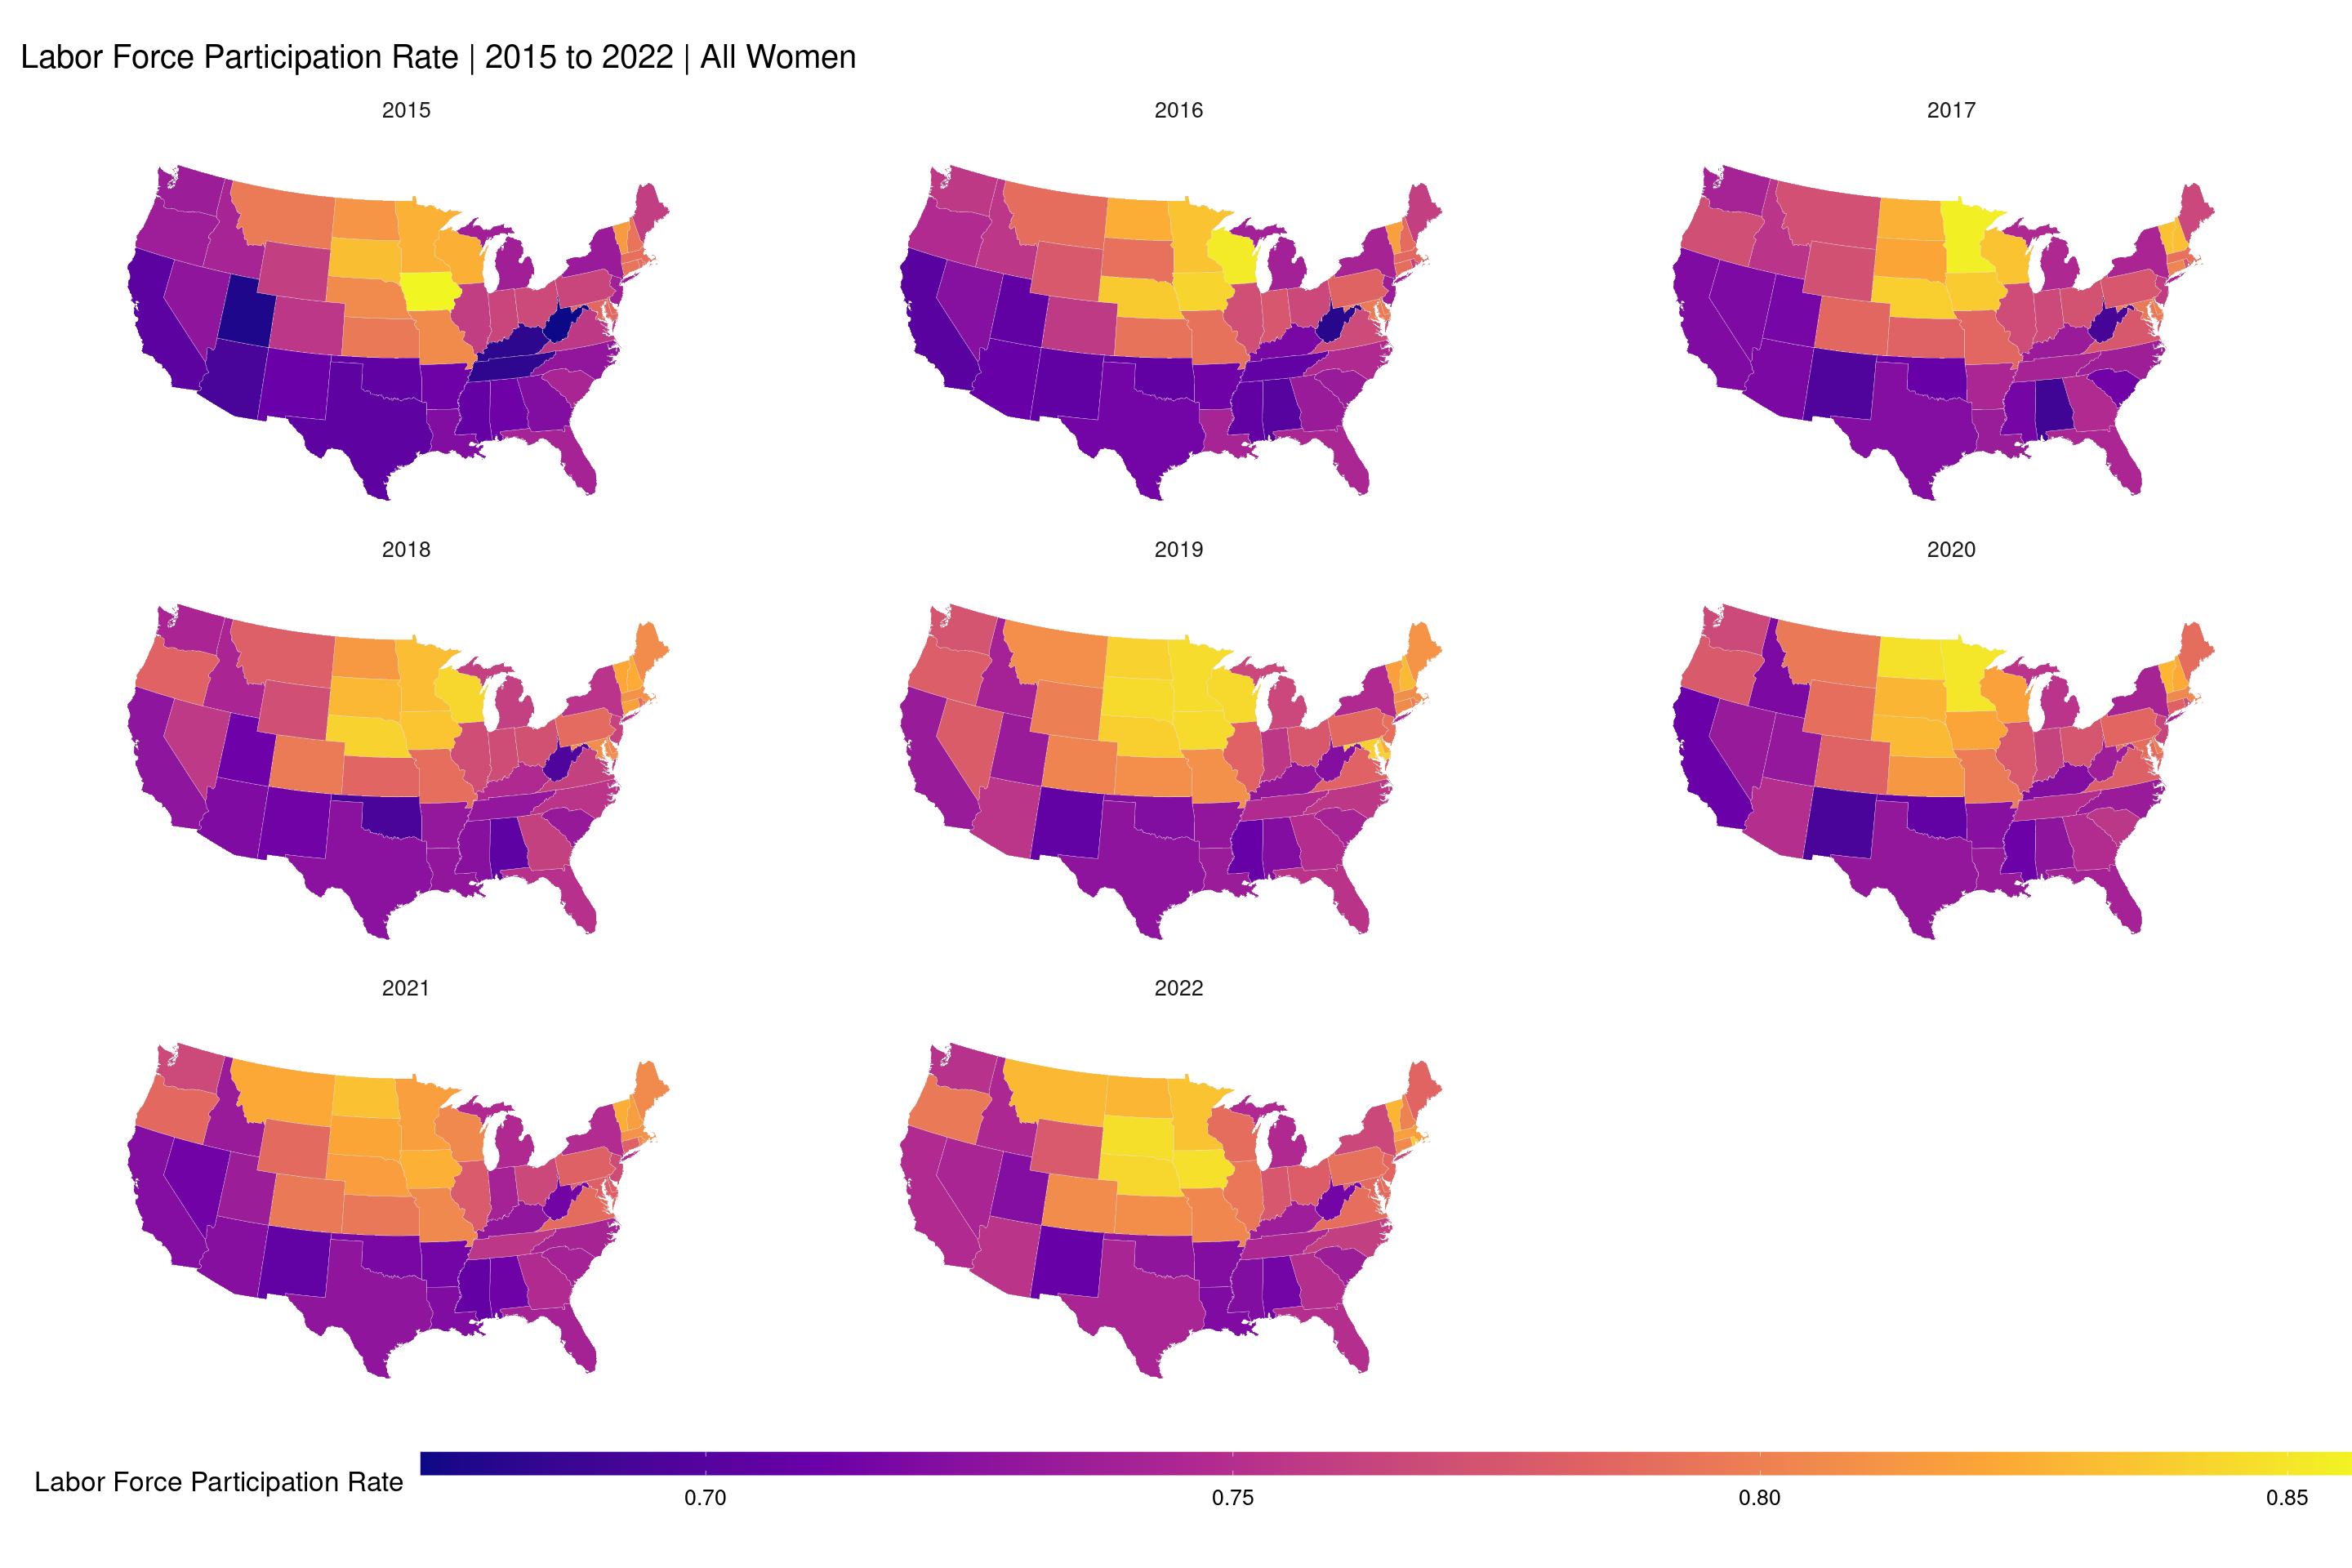

In [10]:
# Labor Force Participation Rate
r0 <- ggplot(data = subset(state_map_data),
             mapping = aes(x = long, y = lat,
                           group = group,
                           fill = LFP_Women) )
       
r1 <- r0 + geom_polygon(color = "gray90", linewidth = 0.10) +
  coord_map(projection = "albers", lat0 = 39, lat1 = 45) 

r2 <- r1 + scale_fill_viridis_c(option = "plasma", label=function(x) sprintf("%.2f",x))

r2 + theme_map() + facet_wrap(~ Year, ncol = 3) +
  theme(legend.position = "bottom",
        strip.background = element_blank()) +
  labs(fill = "Labor Force Participation Rate ",
       title = "Labor Force Participation Rate | 2015 to 2022 | All Women") 

The story repeats. Things were good. Then they got really bad. And they're either the same as the pre-pandemic levels - or better now.

My recommendation is HHS leadership to take no action on designing supports specifically targeting women affected by the pandemic. Whether segments of women - that is, those with young children - should receive other supports to encourage their labor supply is a great research question for another time.  For now, congrats on completing your first day as a Department of Health and Human Services Policy Analyst!